#### kaggle 竞赛入门

- 对于刚刚入门机器学习的的同学来说，kaggle竞赛通常是他们学习和跟其他的全世界范围内的参赛选手切磋的一个大的平台，这个平台上提供了一些入门的竞赛，可以供刚入门的同学一展拳脚

- 本文针对房价预测的这个竞赛展开，从EDA，特征工程，到模型调参开始讲述一些竞赛中的小的trick，希望对大家有些帮助,本人基础一般，如果有贻笑大方的地方，可以随意拍砖

In [1]:
from IPython.display import HTML
from IPython.display import Image

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

#### 导入常用的数据分析以及模型的库

In [2]:
import pandas as pd
import numpy as np

- 查看当前目录下的文件可以使用！ls

In [3]:
!ls

data_description.txt
data_description.zip
kaggle house price.ipynb
sample_submission.csv
stacking-house-prices-walkthrough-to-top-5.ipynb
test.csv
train.csv


In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


- 数据结构类似于波士顿房屋的价格数据，其中该数据集中有79个特征，来描述房屋，可以通过数据描述来查看对应字段的意义
- 同时本文也将缺失值处理的方法进行阐述
- PoolQC           7 non-null object
- Fence            281 non-null object
- MiscFeature      54 non-null object  以上三个特征缺失较为明显，后文将有对应的对缺失值处理的方法

#### 数据处理

![处理异常值](https://ws1.sinaimg.cn/large/9ebd4c2bly1g4sv6rwu1ij20ja0cj77r.jpg)

- 异常值通常是指在预期的值之外，至于如何处理异常值，怎么界定异常值，取决于个人和特定的问题
- 对于异常值通常会在数据分布点之外，因此通常会让计算的结果和数据的分布
- 以下图为例

![](https://ws1.sinaimg.cn/large/9ebd4c2bly1g4svlxc1xzj20nr07daaq.jpg)

In [8]:
with open ('data_description.txt','r') as f:
    for i in f.readlines():
        print(i)
        break
    

MSSubClass: Identifies the type of dwelling involved in the sale.	




#### Data fields

Here's a brief version of what you'll find in the data description file.

- **SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.
- **MSSubClass**: The building class
- **MSZoning**: The general zoning classification
- **LotFrontage**: Linear feet of street connected to property
- **LotArea**: Lot size in square feet
- **Street**: Type of road access
- **Alley**: Type of alley access
- **LotShape**: General shape of property
- **LandContour**: Flatness of the property
- **Utilities**: Type of utilities available
- **LotConfig**: Lot configuration
- **LandSlope**: Slope of property
- **Neighborhood**: Physical locations within Ames city limits
- **Condition1**: Proximity to main road or railroad
- **Condition2**: Proximity to main road or railroad (if a second is present)
- **BldgType**: Type of dwelling
- **HouseStyle**: Style of dwelling
- **OverallQual**: Overall material and finish quality
- **OverallCond**: Overall condition rating
- **YearBuilt**: Original construction date
- **YearRemodAdd**: Remodel date
- **RoofStyle**: Type of roof
- **RoofMatl**: Roof material
- **Exterior1st**: Exterior covering on house
- **Exterior2nd**: Exterior covering on house (if more than one material)
- **MasVnrType**: Masonry veneer type
- **MasVnrArea**: Masonry veneer area in square feet
- **ExterQual**: Exterior material quality
- **ExterCond**: Present condition of the material on the exterior
- **Foundation**: Type of foundation
- **BsmtQual**: Height of the basement
- **BsmtCond**: General condition of the basement
- **BsmtExposure**: Walkout or garden level basement walls
- **BsmtFinType1**: Quality of basement finished area
- **BsmtFinSF1**: Type 1 finished square feet
- **BsmtFinType2**: Quality of second finished area (if present)
- **BsmtFinSF2**: Type 2 finished square feet
- **BsmtUnfSF**: Unfinished square feet of basement area
- **TotalBsmtSF**: Total square feet of basement area
- **Heating**: Type of heating
- **HeatingQC**: Heating quality and condition
- **CentralAir**: Central air conditioning
- **Electrical**: Electrical system
- **1stFlrSF**: First Floor square feet
- **2ndFlrSF**: Second floor square feet
- **LowQualFinSF**: Low quality finished square feet (all floors)
- **GrLivArea**: Above grade (ground) living area square feet
- **BsmtFullBath**: Basement full bathrooms
- **BsmtHalfBath**: Basement half bathrooms
- **FullBath**: Full bathrooms above grade
- **HalfBath**: Half baths above grade
- **Bedroom**: Number of bedrooms above basement level
- **Kitchen**: Number of kitchens
- **KitchenQual**: Kitchen quality
- **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
- **Functional**: Home functionality rating
- **Fireplaces**: Number of fireplaces
- **FireplaceQu**: Fireplace quality
- **GarageType**: Garage location
- **GarageYrBlt**: Year garage was built
- **GarageFinish**: Interior finish of the garage
- **GarageCars**: Size of garage in car capacity
- **GarageArea**: Size of garage in square feet
- **GarageQual**: Garage quality
- **GarageCond**: Garage condition
- **PavedDrive**: Paved driveway
- **WoodDeckSF**: Wood deck area in square feet
- **OpenPorchSF**: Open porch area in square feet
- **EnclosedPorch**: Enclosed porch area in square feet
- **3SsnPorch**: Three season porch area in square feet
- **ScreenPorch**: Screen porch area in square feet
- **PoolArea**: Pool area in square feet
- **PoolQC**: Pool quality
- **Fence**: Fence quality
- **MiscFeature**: Miscellaneous feature not covered in other categories
- **MiscVal**: $Value of miscellaneous feature
- **MoSold**: Month Sold
- **YrSold**: Year Sold
- **SaleType**: Type of sale
- **SaleCondition**: Condition of sale

- 首先看这个特征 GrLivArea: Above grade (ground) living area square feet,是指居住面积平方英尺

##### 去除异常值

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')

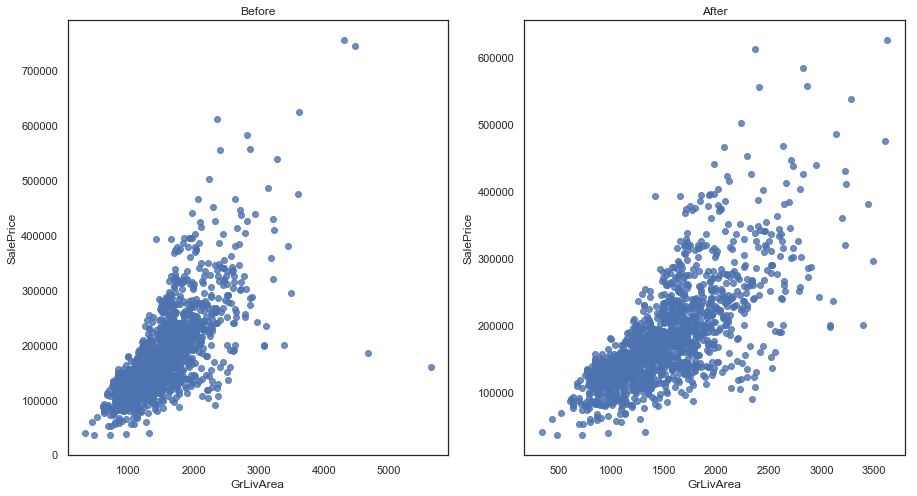

In [10]:
plt.subplots(figsize=(15,8))
plt.subplot(1,2,1)
g= sns.regplot(x=train['GrLivArea'],y= train['SalePrice'],fit_reg=False).set_title('Before')
plt.subplot(1,2,2)
train= train.drop(train[train['GrLivArea']>4000].index)
g=sns.regplot(x=train['GrLivArea'],y=train['SalePrice'],fit_reg=False).set_title('After')

* 从以上图中可以发现，居住面积大于4000的样本总共有4个，且这个四个属于严重的偏离分布

##### 处理缺失值
- 缺失值可能是由于人工输入错误，机器误差等问题导致的
- 有些例子中的缺失值可以使用0进行填充，前提是需要知道该特征代表的意义，缺失即代表0
- 实际情况中，填充0并不总是最好的办法，而且针对不同的算法，对于缺失值处理的能力不同，本文需要使用多种算法进行拟合房价，因此如何正确处理缺失值呢，一般有两种方法：
    - 直接删掉带有缺失值的列
    - 填充缺失值

In [11]:
# 首先先把训练数据与测试数据的长度保持，以备后用
ntrain = train.shape[0]
ntest = test.shape[0]

# 保持训练集的目标值数据即 SalePrice
y_train = train.SalePrice.values
all_data = pd.concat((train,test)).reset_index(drop=True)
all_data.drop(['SalePrice'],axis=1,inplace=True)
all_data.drop(['Id'],axis=1,inplace=True)
print('all data shape:{}'.format(all_data.shape))

all data shape:(2915, 79)


In [12]:
all_data_na = all_data.isnull().sum()

In [13]:
all_data_na.sort_values(ascending=False)

PoolQC           2907
MiscFeature      2810
Alley            2717
Fence            2345
FireplaceQu      1420
LotFrontage       486
GarageFinish      159
GarageQual        159
GarageYrBlt       159
GarageCond        159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
BsmtHalfBath        2
Utilities           2
Functional          2
BsmtFullBath        2
Electrical          1
Exterior2nd         1
KitchenQual         1
GarageCars          1
Exterior1st         1
GarageArea          1
TotalBsmtSF         1
                 ... 
GrLivArea           0
YearRemodAdd        0
YearBuilt           0
WoodDeckSF          0
TotRmsAbvGrd        0
Street              0
ScreenPorch         0
SaleCondition       0
RoofStyle           0
RoofMatl            0
PoolArea            0
PavedDrive          0
OverallQual         0
OverallCond         0
OpenPorchS

In [14]:
all_data_na = all_data_na.drop(all_data_na[all_data_na==0].index).sort_values(ascending=False)

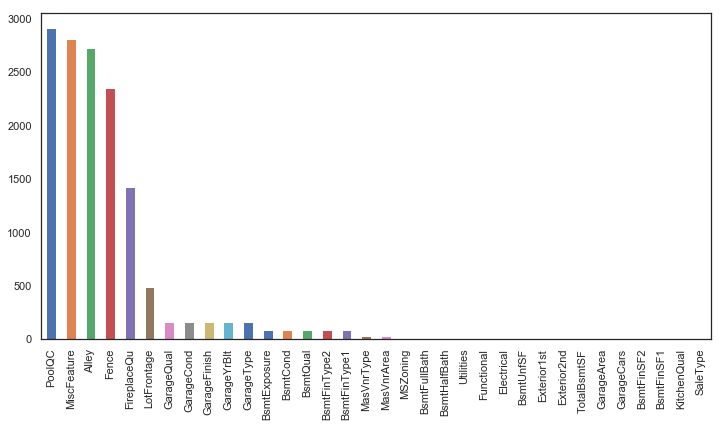

In [15]:
plt.subplots(figsize=(12,6))
all_data_na.plot(kind='Bar')

- [参考链接](https://www.kaggle.com/agodwinp/stacking-house-prices-walkthrough-to-top-5)

In [16]:
!pip install xgboost

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [17]:
train[all_data_na.index[:25]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 25 columns):
PoolQC          5 non-null object
MiscFeature     54 non-null object
Alley           91 non-null object
Fence           280 non-null object
FireplaceQu     766 non-null object
LotFrontage     1197 non-null float64
GarageQual      1375 non-null object
GarageCond      1375 non-null object
GarageFinish    1375 non-null object
GarageYrBlt     1375 non-null float64
GarageType      1375 non-null object
BsmtExposure    1418 non-null object
BsmtCond        1419 non-null object
BsmtQual        1419 non-null object
BsmtFinType2    1418 non-null object
BsmtFinType1    1419 non-null object
MasVnrType      1448 non-null object
MasVnrArea      1448 non-null float64
MSZoning        1456 non-null object
BsmtFullBath    1456 non-null int64
BsmtHalfBath    1456 non-null int64
Utilities       1456 non-null object
Functional      1456 non-null object
Electrical      1455 non-null object
BsmtUnfSF    

- for category feature we,fill these missing values with "None"
- for float feature and the number of missing values seemingly much larger ,we fill these missing values with median of the feature
- for float feature and the number of missing values smaller, we will fill these missing values with mode

In [18]:
for col in ("PoolQC", 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageQual', 'GarageCond',
            'GarageFinish', 'GarageType','BsmtExposure','BsmtCond','BsmtQual','BsmtFinType2','BsmtFinType1',
           'MasVnrType'):
    all_data[col] = all_data[col].fillna('None')

    
print('处理object类型缺失值，根据特征的描述，特征缺失值补充为"None"，已完成')
    
for col in ("GarageYrBlt", "GarageArea", "GarageCars", "BsmtFinSF1", 
           "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "MasVnrArea",
           "BsmtFullBath", "BsmtHalfBath"):
    all_data[col] = all_data[col].fillna(0)

print('处理数值类型的缺失值，根据特征的描述，选择特征缺失值补充为0，已完成')


all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data["Functional"] = all_data["Functional"].fillna(all_data['Functional'].mode()[0])

print('处理缺失值较少的缺失值，数据类型为数值，填充缺失值为该特征的众数，已完成')

all_data_na = all_data.isnull().sum()
print("Features with missing values: ", all_data_na.drop(all_data_na[all_data_na == 0].index))


处理object类型缺失值，根据特征的描述，特征缺失值补充为"None"，已完成
处理数值类型的缺失值，根据特征的描述，选择特征缺失值补充为0，已完成
处理缺失值较少的缺失值，数据类型为数值，填充缺失值为该特征的众数，已完成
Features with missing values:  LotFrontage    486
Utilities        2
dtype: int64


In [19]:
all_data.groupby(["Neighborhood"])['LotFrontage'].sum()

Neighborhood
Blmngtn      938.0
Blueste      273.0
BrDale       645.0
BrkSide     5300.0
ClearCr     1763.0
CollgCr    15694.0
Crawfor     5806.0
Edwards    11467.0
Gilbert     8237.0
IDOTRR      5415.0
MeadowV      845.0
Mitchel     6763.0
NAmes      28204.0
NPkVill      591.0
NWAmes      6929.0
NoRidge     4684.0
NridgHt    13722.0
OldTown    14147.0
SWISU       2599.0
Sawyer      7306.0
SawyerW     7491.0
Somerst    10457.0
StoneBr     2860.0
Timber      4626.0
Veenker     1152.0
Name: LotFrontage, dtype: float64

In [20]:
all_data['LotFrontage']=all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

##### 重点分析 Utilities

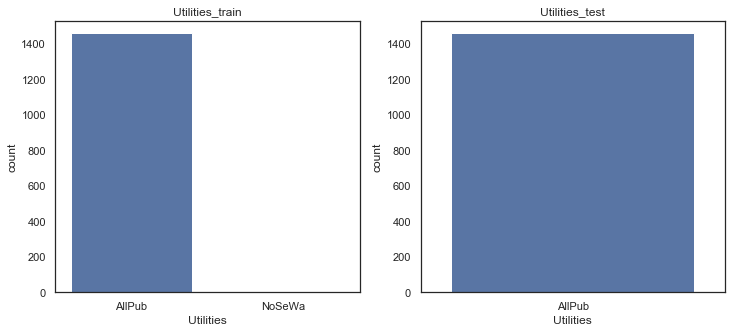

In [21]:
plt.subplots(figsize=(12,5))
plt.subplot(1,2,1)
g=sns.countplot(x='Utilities',data=train).set_title('Utilities_train')
plt.subplot(1,2,2)
g=sns.countplot(x='Utilities',data=test).set_title('Utilities_test')

In [22]:
train['Utilities'].value_counts()

AllPub    1455
NoSeWa       1
Name: Utilities, dtype: int64

In [23]:
test['Utilities'].value_counts()

AllPub    1457
Name: Utilities, dtype: int64

In [24]:
all_data = all_data.drop(['Utilities'], axis=1)

In [25]:
all_data_na = all_data.isnull().sum()
print("Features with missing values: ", len(all_data_na.drop(all_data_na[all_data_na == 0].index)))

Features with missing values:  0


#### Exploratory Data Analysis

##### Correlation matrix

- 异常值与缺失值已经处理完毕，进一步需要特征之间与特征与目标值之间的关系，相关系数矩阵就是提供了反应特征与目标值之间关系的一个参考

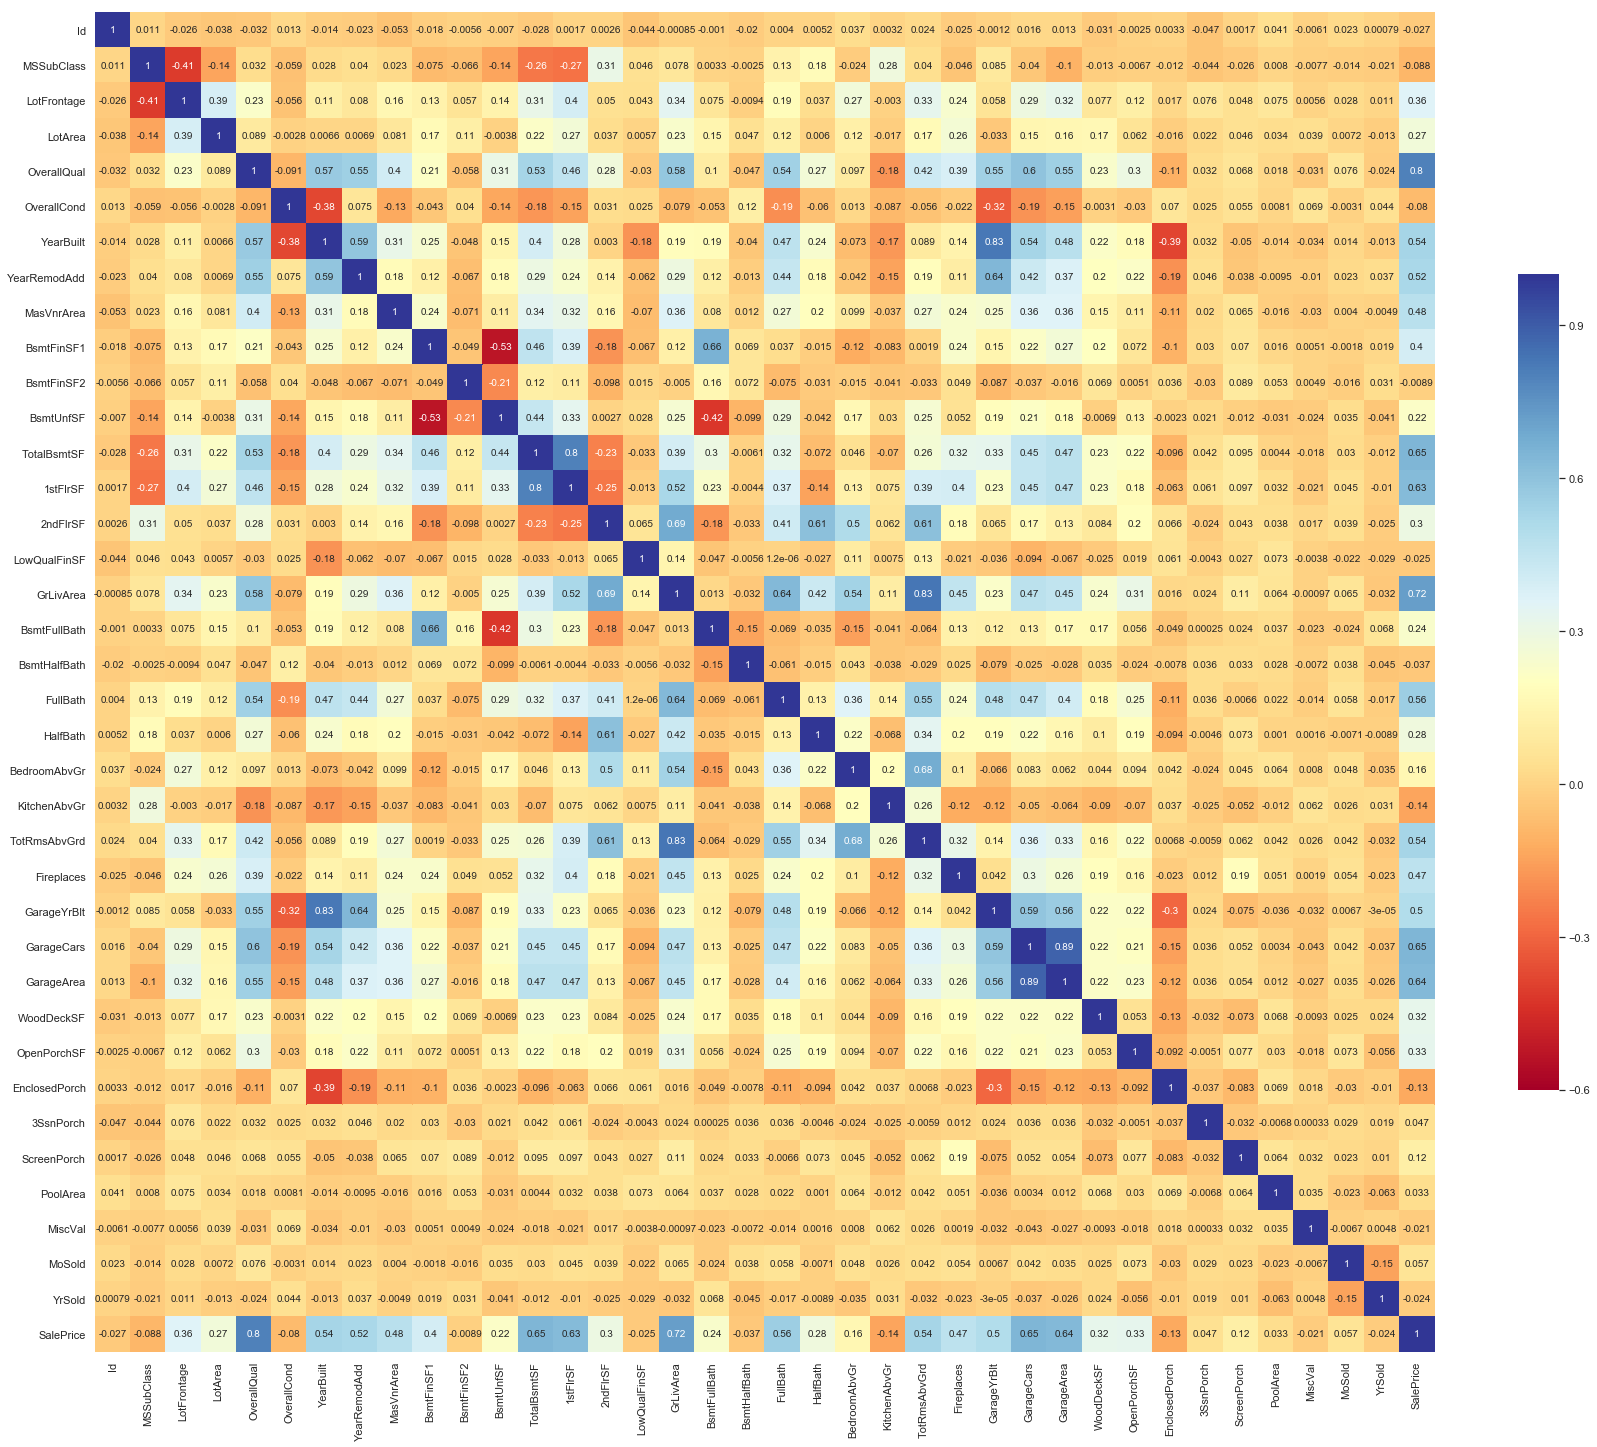

In [26]:
corr = train.corr()
plt.subplots(figsize=(30,30))
cmap = sns.diverging_palette(150, 250, as_cmap=True)
sns.heatmap(corr, cmap="RdYlBu", vmax=1, vmin=-0.6, center=0.2, square=True, linewidths=0, cbar_kws={"shrink": .5}, annot = True)

- for raw highly influencing factors on SalePrice, we could do feature engineering 

- 从相关系数矩阵中，我们挑选了一些跟最终售价相关性较高的做进一步的分析

- 主要的影响因素有以下几个:
1. **OverallQual**  Overall material and finish quality  整体的物料以及完成质量
2. **GrLivArea**  Above grade (ground) living area square feet 地面以上的居住面积 平方英尺
3. **GarageCars**  Size of garage in car capacity 停车场的大小，可以放几辆车
4. **GarageArea**   Size of garage in square feet 停车场的面积大小
5. **TotalBsmtSF** Total square feet of basement area 地下室的面积 平方英尺
6. **1stFlrSF**  First Floor square feet 一楼的面积 平方英尺
7. **FullBath** Full bathrooms above grade 地上卫生间
8. **TotRmsAbvGrd**   Total rooms above grade (does not include bathrooms) 地上去掉卫生间的房屋数
9. **Fireplaces**   壁炉数量
10. **MasVnrArea**  Masonry veneer area in square feet  粗略可以理解为石灰结构的建筑面积
11. **BsmtFinSF1**  Quality of basement finished area Type 1 finished square feet地下室的完成面积
12. **LotFrontage**   Linear feet of street connected to property  距离街道的距离
13. **WoodDeckSF**  Wood deck area in square feet  木质结构的建筑面积
14. **OpenPorchSF**   Open porch area in square feet  开放式门廊的面积
15. **2ndFlrSF**  Second floor square feet  二楼的面积

In [27]:
# Quadratic
all_data["OverallQual-2"] = all_data["OverallQual"] ** 2
all_data["GrLivArea-2"] = all_data["GrLivArea"] ** 2
all_data["GarageCars-2"] = all_data["GarageCars"] ** 2
all_data["GarageArea-2"] = all_data["GarageArea"] ** 2
all_data["TotalBsmtSF-2"] = all_data["TotalBsmtSF"] ** 2
all_data["1stFlrSF-2"] = all_data["1stFlrSF"] ** 2
all_data["FullBath-2"] = all_data["FullBath"] ** 2
all_data["TotRmsAbvGrd-2"] = all_data["TotRmsAbvGrd"] ** 2
all_data["Fireplaces-2"] = all_data["Fireplaces"] ** 2
all_data["MasVnrArea-2"] = all_data["MasVnrArea"] ** 2
all_data["BsmtFinSF1-2"] = all_data["BsmtFinSF1"] ** 2
all_data["LotFrontage-2"] = all_data["LotFrontage"] ** 2
all_data["WoodDeckSF-2"] = all_data["WoodDeckSF"] ** 2
all_data["OpenPorchSF-2"] = all_data["OpenPorchSF"] ** 2
all_data["2ndFlrSF-2"] = all_data["2ndFlrSF"] ** 2
print("Quadratics done!...")


# Cubic
all_data["OverallQual-23"] = all_data["OverallQual"] ** 3
all_data["GrLivArea-3"] = all_data["GrLivArea"] ** 3
all_data["GarageCars-3"] = all_data["GarageCars"] **3
all_data["GarageArea-3"] = all_data["GarageArea"] ** 3
all_data["TotalBsmtSF-3"] = all_data["TotalBsmtSF"] ** 3
all_data["1stFlrSF-3"] = all_data["1stFlrSF"] ** 3
all_data["FullBath-3"] = all_data["FullBath"] ** 3
all_data["TotRmsAbvGrd-3"] = all_data["TotRmsAbvGrd"] ** 3
all_data["Fireplaces-3"] = all_data["Fireplaces"] ** 3
all_data["MasVnrArea-3"] = all_data["MasVnrArea"] ** 3
all_data["BsmtFinSF1-3"] = all_data["BsmtFinSF1"] ** 3
all_data["LotFrontage-3"] = all_data["LotFrontage"] ** 3
all_data["WoodDeckSF-3"] = all_data["WoodDeckSF"] ** 3
all_data["OpenPorchSF-3"]=all_data["OpenPorchSF"] ** 3
all_data["2ndFlrSF-3"]= all_data["2ndFlrSF"] ** 3
print("Quadratics done!...")



# Square Root
all_data["OverallQual-Sq"] = np.sqrt(all_data["OverallQual"])
all_data["GrLivArea-Sq"] = np.sqrt(all_data["GrLivArea"])
all_data["GarageCars-Sq"] = np.sqrt(all_data["GarageCars"])
all_data["GarageArea-Sq"] = np.sqrt(all_data["GarageArea"])
all_data["TotalBsmtSF-Sq"] = np.sqrt(all_data["TotalBsmtSF"])
all_data["1stFlrSF-Sq"] = np.sqrt(all_data["1stFlrSF"])
all_data["FullBath-Sq"] = np.sqrt(all_data["FullBath"])
all_data["TotRmsAbvGrd-Sq"] = np.sqrt(all_data["TotRmsAbvGrd"])
all_data["Fireplaces-Sq"] = np.sqrt(all_data["Fireplaces"])
all_data["MasVnrArea-Sq"] = np.sqrt(all_data["MasVnrArea"])
all_data["BsmtFinSF1-Sq"] = np.sqrt(all_data["BsmtFinSF1"])
all_data["LotFrontage-Sq"] = np.sqrt(all_data["LotFrontage"])
all_data["WoodDeckSF-Sq"] = np.sqrt(all_data["WoodDeckSF"])
all_data["OpenPorchSF-Sq"] = np.sqrt(all_data["OpenPorchSF"])
all_data["2ndFlrSF-Sq"] = np.sqrt(all_data["2ndFlrSF"])
print("Roots done!...")







Quadratics done!...
Quadratics done!...
Roots done!...


#####  BsmtQual 

In [28]:
train['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    117
Fa     35
Name: BsmtQual, dtype: int64

In [29]:
train.groupby(['BsmtQual'])['SalePrice'].mean()
"""
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
"""

'\nBsmtQual: Evaluates the height of the basement\n\n       Ex\tExcellent (100+ inches)\t\n       Gd\tGood (90-99 inches)\n       TA\tTypical (80-89 inches)\n       Fa\tFair (70-79 inches)\n       Po\tPoor (<70 inches\n       NA\tNo Basement\n'

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


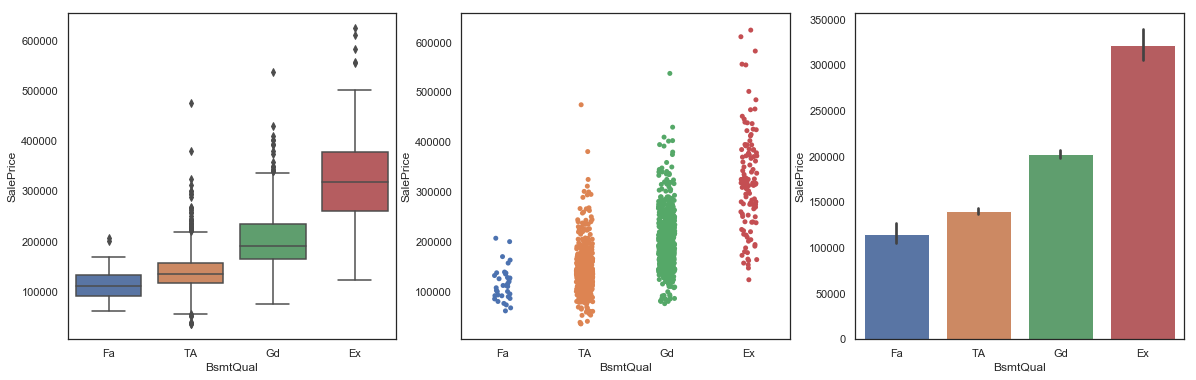

In [30]:
plt.subplots(figsize=(20,6))
plt.subplot(1,3,1)# 箱形图
sns.boxplot(x='BsmtQual',y='SalePrice',data=train,order= ['Fa', 'TA', 'Gd', 'Ex'])


plt.subplot(1,3,2) # x轴里的类别进行分类
sns.stripplot(x='BsmtQual',y='SalePrice',data=train,size=5,jitter=True,order= ['Fa', 'TA', 'Gd', 'Ex'])


plt.subplot(1,3,3) # 柱状图
sns.barplot(x='BsmtQual',y='SalePrice',data=train,order= ['Fa', 'TA', 'Gd', 'Ex'],estimator=np.mean)


In [31]:
all_data['BsmtQual'] = all_data['BsmtQual'].map({"None":0, "Fa":1, "TA":2, "Gd":3, "Ex":4})
all_data['BsmtQual'].unique()

array([3, 2, 4, 0, 1], dtype=int64)

In [35]:
all_data['BsmtQual'].value_counts()

2    1283
3    1209
4     254
1      88
0      81
Name: BsmtQual, dtype: int64

- 很明显，该特征能够显著的影响销售价格，而且越高的的地下室，对应的价格也越高
- typical and good 两个分部数量较大，占比较高
- 可以将该特征的变量是有高低好坏之分的，也就是category 特征的顺序性，可以转化为数字(个人觉得意义不大）

##### BsmtCond

In [32]:
"""
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
"""




'\nBsmtCond: Evaluates the general condition of the basement\n\n       Ex\tExcellent\n       Gd\tGood\n       TA\tTypical - slight dampness allowed\n       Fa\tFair - dampness or some cracking or settling\n       Po\tPoor - Severe cracking, settling, or wetness\n       NA\tNo Basement\n'

c:\anaconda3\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


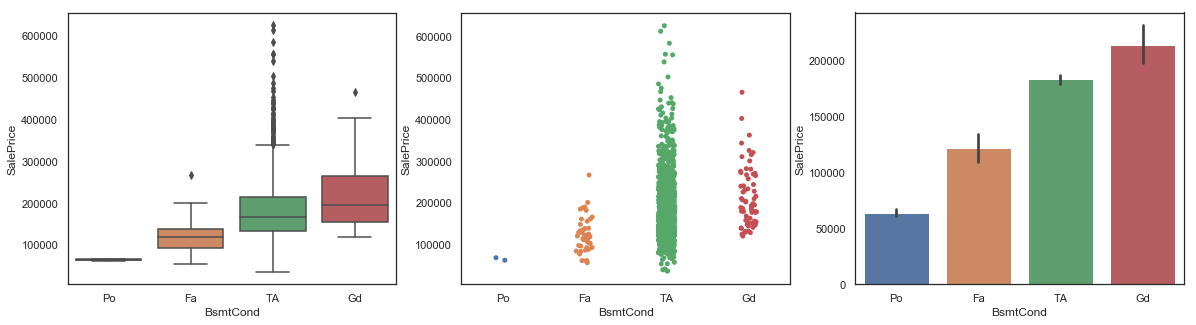

In [45]:
plt.subplots(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x='BsmtCond',y='SalePrice',data=train,order=['Po','Fa','TA','Gd'])
plt.subplot(1,3,2)


sns.stripplot(x='BsmtCond',y='SalePrice',data=train,size=5,jitter=True,order= ['Po','Fa','TA','Gd'])


plt.subplot(1,3,3)


sns.barplot(x='BsmtCond',y='SalePrice',data=train,order=['Po','Fa','TA','Gd'])



In [37]:
train['BsmtCond'].value_counts()

TA    1307
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

- 图二中的Typical样本数据占比较高，从barplot中可以看出该特征能够很明显的影响售出价格
- 针对图一种的TA价格较为分散，价格分布离散

In [46]:
all_data['BsmtCond'] = all_data['BsmtCond'].map({"None":0, "Po":1, "Fa":2, "TA":3,"Gd":4, "Ex":5})
all_data['BsmtCond'].unique()

array([3, 4, 0, 2, 1], dtype=int64)